In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
year = 25
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*year)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

adj_close_df = pd.DataFrame()
for ticker in tickers:
    print(f"Downloading {ticker}...")
    data = yf.download(ticker, start =startDate, end = endDate, progress=False)
    adj_close_df[ticker] = data['Close']

#For Debugging Purposes:
#print(f"columns for {tickers}: {data.columns.tolist()}")
#print(f"Data shape: {data.shape}")
#print(f"Data head:n\{data.head(2)}")

log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

portfolio_value = 500000
weights = np.array([1/len(tickers)] * len(tickers))
weighted_series = pd.Series(weights, index=log_returns.columns)
historical_returns = (log_returns * weighted_series).sum(axis=1)

days = 5
range_returns = historical_returns.rolling(window=days).sum()
#Test
#print(range_returns)

C:\Users\User\AppData\Local\Temp\ipykernel_8440\3025660287.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start =startDate, end = endDate, progress=False)


C:\Users\User\AppData\Local\Temp\ipykernel_8440\3025660287.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start =startDate, end = endDate, progress=False)


C:\Users\User\AppData\Local\Temp\ipykernel_8440\3025660287.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start =startDate, end = endDate, progress=False)


C:\Users\User\AppData\Local\Temp\ipykernel_8440\3025660287.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start =startDate, end = endDate, progress=False)


C:\Users\User\AppData\Local\Temp\ipykernel_8440\3025660287.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start =startDate, end = endDate, progress=False)


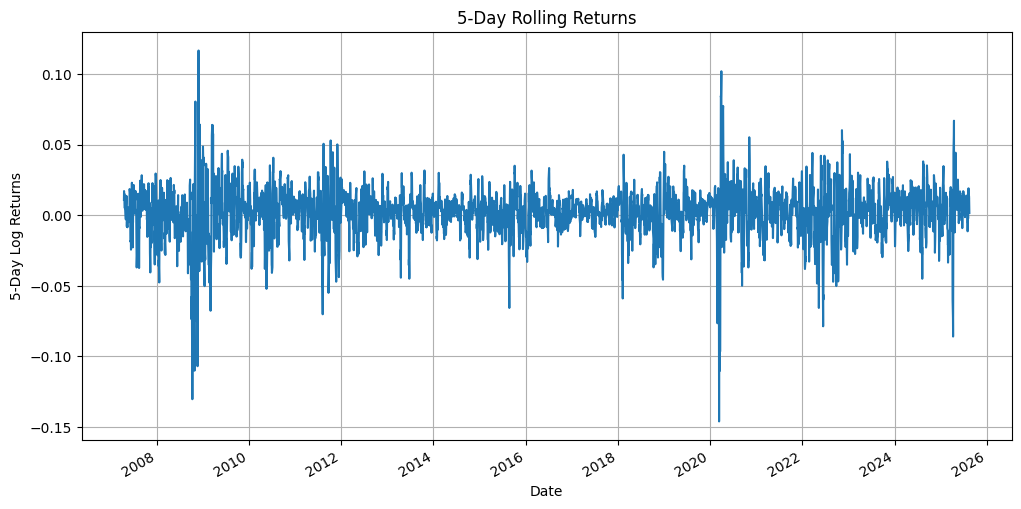

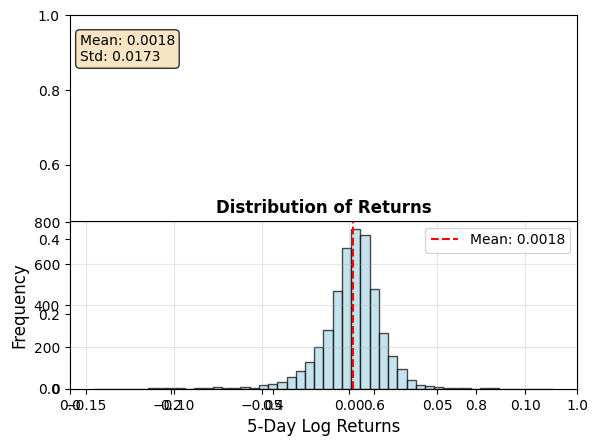

In [3]:
#Plotting was created with the assistance of AI
range_returns.plot(figsize=(12, 6), title=f'{days}-Day Rolling Returns', grid=True)
plt.ylabel(f'{days}-Day Log Returns')
plt.show()

mean_return = range_returns.mean()
std_return = range_returns.std()
plt.text(0.02, 0.95, f'Mean: {mean_return:.4f}\nStd: {std_return:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.subplot(2, 1, 2)
plt.hist(range_returns.dropna(), bins=50, alpha=0.7, color='lightblue', edgecolor='black')
plt.axvline(mean_return, color='red', linestyle='--', label=f'Mean: {mean_return:.4f}')
plt.title('Distribution of Returns', fontsize=12, fontweight='bold')
plt.xlabel(f'{days}-Day Log Returns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()